# Tensorflow Linear models

Tensorflow implementations from scratch using numpy and tensorflow libraries - AlberErre (Author)


## 1) Simple linear model using random numerical data (linear_nn.py)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Real variables of the model and Dataset (just 2D numerical data created randomly)

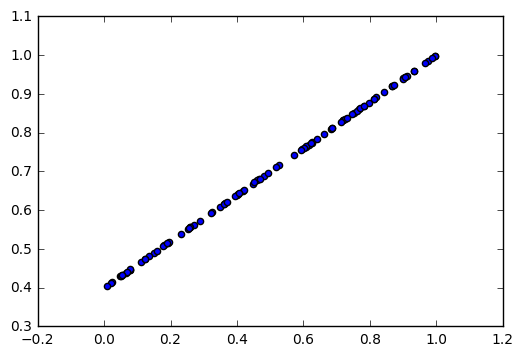

In [3]:
_realWeights =  0.6
_realBiases =   0.4
x_data = np.random.rand(100).astype(np.float32) # Random x values
y_data = _realWeights*x_data + _realBiases # Y values following a linear structure

plt.scatter(x_data,y_data)
plt.show()

The main goal is use this Neural Network to estimate the real values that fit this model (_realWeights and _realBiases) using the model variables (_modelWeights and _modelBiases).

In [4]:
_modelWeights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
_modelBiases = tf.Variable(tf.zeros([1]))

### Linear model: 

In [5]:
Predicted_y = _modelWeights*x_data + _modelBiases

### Training - estimating model's parameters using Gradient Descent (minimization)

In [6]:
## Calculate de square error between predicted and real "y" values
Loss_error = tf.reduce_mean(tf.square(Predicted_y - y_data))

## Training: update variables using gradient descent and minimize Loss_error
optimizer = tf.train.GradientDescentOptimizer(0.5)
trainModel = optimizer.minimize(Loss_error)

### Initializing variables and Running the model

In [7]:
## Run the model and init
init = tf.initialize_all_variables()#, no longer availability after 2017-03-02. 
#init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

### Increasing accuracy every n_step

Once the variables are inizialized, the session upgrade these variables minimizing the error until convergence. Thus, this code will plot the variables results every 15 n_steps (batch = 15).

Both values, "_modelWeights" and "_modelBiases" approximate to real values in each iteration. In other words, they converge to "_realWeights" and "_realBiases" respectively. 

In [8]:
# Increasing Range will increase the accuracy of the model
for step in range(116):
    sess.run(trainModel)
    if step % 15 == 0: # Batch: 15, plot results every 15 observations
        print("Observation:", step, 
              "Model Weights", sess.run(_modelWeights),
              "Model Biases:", sess.run(_modelBiases),
              "Real Weights:", _realWeights, 
              "Real Biases:", _realBiases)

Observation: 0 Model Weights [ 0.48578897] Model Biases: [ 0.63881969] Real Weights: 0.6 Real Biases: 0.4
Observation: 15 Model Weights [ 0.53452104] Model Biases: [ 0.43525663] Real Weights: 0.6 Real Biases: 0.4
Observation: 30 Model Weights [ 0.57722205] Model Biases: [ 0.41226462] Real Weights: 0.6 Real Biases: 0.4
Observation: 45 Model Weights [ 0.5920763] Model Biases: [ 0.40426645] Real Weights: 0.6 Real Biases: 0.4
Observation: 60 Model Weights [ 0.59724367] Model Biases: [ 0.40148416] Real Weights: 0.6 Real Biases: 0.4
Observation: 75 Model Weights [ 0.59904116] Model Biases: [ 0.4005163] Real Weights: 0.6 Real Biases: 0.4
Observation: 90 Model Weights [ 0.59966648] Model Biases: [ 0.40017959] Real Weights: 0.6 Real Biases: 0.4
Observation: 105 Model Weights [ 0.59988397] Model Biases: [ 0.4000625] Real Weights: 0.6 Real Biases: 0.4


# 1) Results: 

This will provide a clear image of how the _modelWeights and _modelBiases values converge until the _realWeights and _realBiases. Which are, in essence, the true values that represent the data and, therefore, the best optimal solution to this problem.

# 2) Simple linear model using noisy data

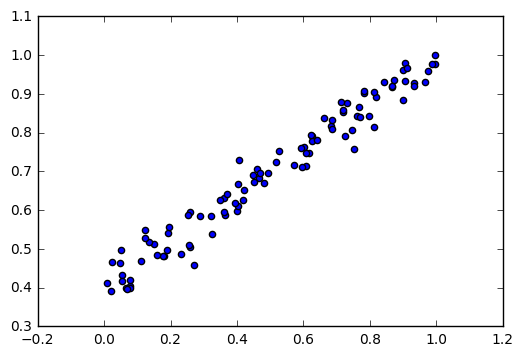

In [83]:
noise = np.random.normal(0, 0.06, x_data.shape)

y_data_noisy = _realWeights*(x_data + noise) + _realBiases # Y values following a linear structure

plt.scatter(x_data,y_data_noisy)
plt.show()


### Create new functions to work with this noisy data

In [84]:
Loss_error_noisy = tf.reduce_mean(tf.square(Predicted_y - y_data_noisy))
optimizer = tf.train.GradientDescentOptimizer(0.5)
trainModel_noisy = optimizer.minimize(Loss_error_noisy)


In [85]:
## Run the model and init
init = tf.initialize_all_variables()#, no longer availability after 2017-03-02.  
#init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

In [86]:
# Increasing Range will increase the accuracy of the model
for step in range(116):
    sess.run(trainModel_noisy)
    if step % 15 == 0: # Batch: 15, plot results every 15 observations
        print("Observation:", step, 
              "Model Weights", sess.run(_modelWeights),
              "Model Biases:", sess.run(_modelBiases),
              "Real Weights:", _realWeights, 
              "Real Biases:", _realBiases)

Observation: 0 Model Weights [ 0.16698903] Model Biases: [ 0.87579864] Real Weights: 0.6 Real Biases: 0.4
Observation: 15 Model Weights [ 0.40761235] Model Biases: [ 0.50024056] Real Weights: 0.6 Real Biases: 0.4
Observation: 30 Model Weights [ 0.52703768] Model Biases: [ 0.43593696] Real Weights: 0.6 Real Biases: 0.4
Observation: 45 Model Weights [ 0.56858182] Model Biases: [ 0.41356784] Real Weights: 0.6 Real Biases: 0.4
Observation: 60 Model Weights [ 0.58303362] Model Biases: [ 0.4057864] Real Weights: 0.6 Real Biases: 0.4
Observation: 75 Model Weights [ 0.58806086] Model Biases: [ 0.40307951] Real Weights: 0.6 Real Biases: 0.4
Observation: 90 Model Weights [ 0.58980972] Model Biases: [ 0.40213785] Real Weights: 0.6 Real Biases: 0.4
Observation: 105 Model Weights [ 0.59041804] Model Biases: [ 0.40181029] Real Weights: 0.6 Real Biases: 0.4


# 2) Results:
### Noise Effect <--
As we can see above, in every iteration the model variables's accuracy goes higher, but what happens when we increase the noise even more?

## 3) Simple linear model using HIGH noisy data

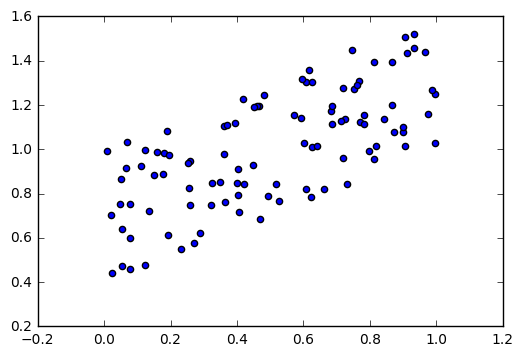

In [94]:
HIGH_noise = np.random.rand(100).astype(np.float32)

y_data_HIGH_noise = _realWeights*(x_data + HIGH_noise) + _realBiases # Y values following a linear structure

plt.scatter(x_data,y_data_HIGH_noise)
plt.show()

In [95]:
Loss_error_noisy_HIGH = tf.reduce_mean(tf.square(Predicted_y - y_data_HIGH_noise)) 
    # We need to update this new noise to the function
optimizer = tf.train.GradientDescentOptimizer(0.5)
trainModel_noisy = optimizer.minimize(Loss_error_noisy_HIGH)

In [96]:
## Run the model and init (HIGH noise)
init = tf.initialize_all_variables()#, no longer availability after 2017-03-02. 
#init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

In [97]:
# Increasing Range will increase the accuracy of the model
for step in range(116):
    sess.run(trainModel_noisy)
    if step % 15 == 0: # Batch: 15, plot results every 15 observations
        print("Observation:", step, 
              "Model Weights", sess.run(_modelWeights),
              "Model Biases:", sess.run(_modelBiases),
              "Real Weights:", _realWeights, 
              "Real Biases:", _realBiases)

Observation: 0 Model Weights [ 0.98653835] Model Biases: [ 0.67278469] Real Weights: 0.6 Real Biases: 0.4
Observation: 15 Model Weights [ 0.70432818] Model Biases: [ 0.64353651] Real Weights: 0.6 Real Biases: 0.4
Observation: 30 Model Weights [ 0.63246858] Model Biases: [ 0.68222874] Real Weights: 0.6 Real Biases: 0.4
Observation: 45 Model Weights [ 0.60747093] Model Biases: [ 0.69568855] Real Weights: 0.6 Real Biases: 0.4
Observation: 60 Model Weights [ 0.59877509] Model Biases: [ 0.70037073] Real Weights: 0.6 Real Biases: 0.4
Observation: 75 Model Weights [ 0.59575015] Model Biases: [ 0.70199949] Real Weights: 0.6 Real Biases: 0.4
Observation: 90 Model Weights [ 0.59469795] Model Biases: [ 0.70256603] Real Weights: 0.6 Real Biases: 0.4
Observation: 105 Model Weights [ 0.5943318] Model Biases: [ 0.7027632] Real Weights: 0.6 Real Biases: 0.4


# 3) Results: 
The accuracy is not that good but the model still represent a good performance

An interesting proposal would be to adapt kernels or further transformations/normalizations to try to vanish the noise and get the patterns that define the slope in the data, as we can imagine a single line in the middle of the points with positive slope!! (an adaptation of Support Vector Machines?)